In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\User\tensorflow_datasets\mnist\3.0.1.incompleteM7BIHE\mnist-train.tfrecord*...:   0%|      …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\User\tensorflow_datasets\mnist\3.0.1.incompleteM7BIHE\mnist-test.tfrecord*...:   0%|       …

Dataset mnist downloaded and prepared to C:\Users\User\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
for batch in mnist_train.shuffle(10_000, seed=42).batch(32).prefetch(1):
    images = batch["image"]
    labels = batch["label"]

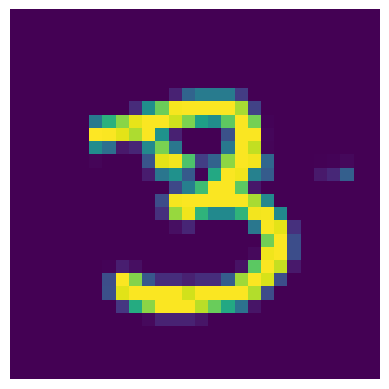

In [7]:
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
show_image(images[0])

In [8]:
mnist_train = mnist_train.shuffle(buffer_size=10_000, seed=42).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)

For simplicity, you can set `as_supervised`=True if its a labeled dataset.

In [17]:
train_set, valid_set, test_set = tfds.load(
    name="mnist",
    split=["train[:90%]", "train[90%:]", "test"],
    as_supervised=True
)

train_set = train_set.shuffle(10_000, seed=42).batch(32).prefetch(1)
valid_set = valid_set.batch(32).cache()
test_set = test_set.batch(32).cache()

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 7s 3ms/step - loss: 10.0410 - accuracy: 0.8348 - val_loss: 6.1822 - val_accuracy: 0.8798
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 5.7487 - accuracy: 0.8773 - val_loss: 6.1066 - val_accuracy: 0.8678
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 5.3064 - accuracy: 0.8829 - val_loss: 6.4510 - val_accuracy: 0.8697
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 5.1258 - accuracy: 0.8862 - val_loss: 5.4888 - val_accuracy: 0.8907
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 4.8821 - accuracy: 0.8871 - val_loss: 6.2701 - val_accuracy: 0.8737


In [19]:
test_loss, test_accuracy = model.evaluate(test_set)

313/313 [==============================] - 1s 2ms/step - loss: 5.4700 - accuracy: 0.8803


### Get a List of all Available Datasets

In [24]:
datasets = tfds.list_builders()

for dataset_name in datasets:
    print(f"Dataset: {dataset_name}")
    print()

Dataset: abstract_reasoning

Dataset: abstract_reasoning

Dataset: accentdb

Dataset: accentdb

Dataset: aeslc

Dataset: aeslc

Dataset: aflw2k3d

Dataset: aflw2k3d

Dataset: ag_news_subset

Dataset: ag_news_subset

Dataset: ai2_arc

Dataset: ai2_arc

Dataset: ai2_arc_with_ir

Dataset: ai2_arc_with_ir

Dataset: amazon_us_reviews

Dataset: amazon_us_reviews

Dataset: anli

Dataset: anli

Dataset: answer_equivalence

Dataset: answer_equivalence

Dataset: arc

Dataset: arc

Dataset: asqa

Dataset: asqa

Dataset: asset

Dataset: asset

Dataset: assin2

Dataset: assin2

Dataset: asu_table_top_converted_externally_to_rlds

Dataset: austin_buds_dataset_converted_externally_to_rlds

Dataset: austin_sailor_dataset_converted_externally_to_rlds

Dataset: austin_sirius_dataset_converted_externally_to_rlds

Dataset: bair_robot_pushing_small

Dataset: bc_z

Dataset: bccd

Dataset: beans

Dataset: bee_dataset

Dataset: beir

Dataset: berkeley_autolab_ur5

Dataset: berkeley_cable_routing

Dataset: ber